In [1]:
from sktime.datasets import load_macroeconomic
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.linear_model import ElasticNet
from sktime.utils.plotting import plot_series

In [2]:
data = load_macroeconomic()
data.head()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
Period,,,,,,,,,,,,
1959Q1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [3]:
train_xy, test_xy = temporal_train_test_split(data, test_size=5)
train_y = train_xy.pop('unemp')
test_y = test_xy.pop('unemp')

forecaster1 = make_reduction(estimator=ElasticNet(random_state=42, max_iter=100000),
                            scitype="tabular-regressor",
                            window_length=5,
                            strategy="recursive",
                            pooling="global")

forecaster1 cutoff PeriodIndex(['2008Q2'], dtype='period[Q-DEC]', name='Period')
forecaster1 cutoff PeriodIndex(['2008Q2'], dtype='period[Q-DEC]', name='Period')
2008Q3     4.793714
2008Q4     6.430364
2009Q1     9.116874
2009Q2    10.521908
2009Q3     9.619637
Freq: Q-DEC, Name: unemp, dtype: float64


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='unemp'>)

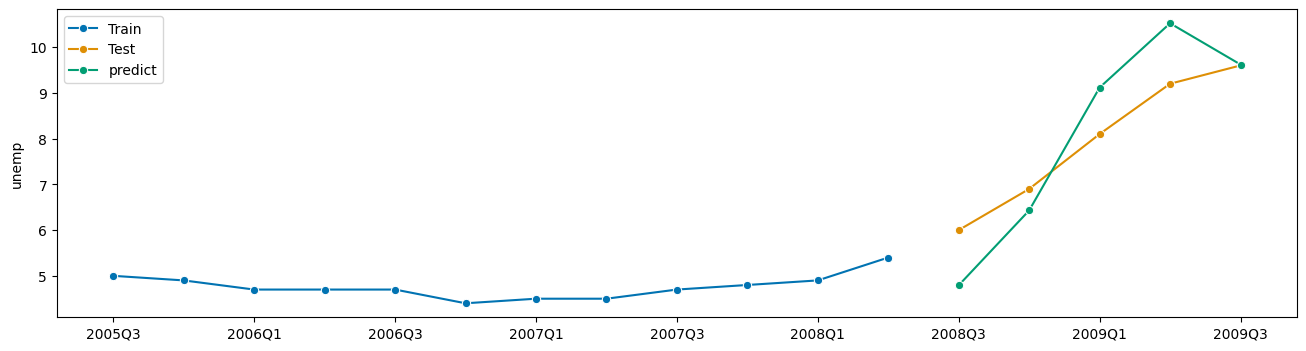

In [4]:
forecaster1.fit(train_y, X=train_xy, fh=[1,2,3,4,5])
print(f'forecaster1 cutoff {forecaster1.cutoff}')
y_predict1 = forecaster1.predict(fh=[1,2,3,4,5], X=test_xy)
print(f'forecaster1 cutoff {forecaster1.cutoff}')
print(y_predict1)
plot_series(train_y.tail(12), test_y,y_predict1, labels=["Train", "Test", "predict"])

forecaster2 cutoff PeriodIndex(['2008Q2'], dtype='period[Q-DEC]', name='Period')
2008Q3    11.373905
2008Q4    11.373905
2009Q1    11.373905
2009Q2    11.373905
2009Q3    11.373905
Freq: Q-DEC, Name: unemp, dtype: float64


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='unemp'>)

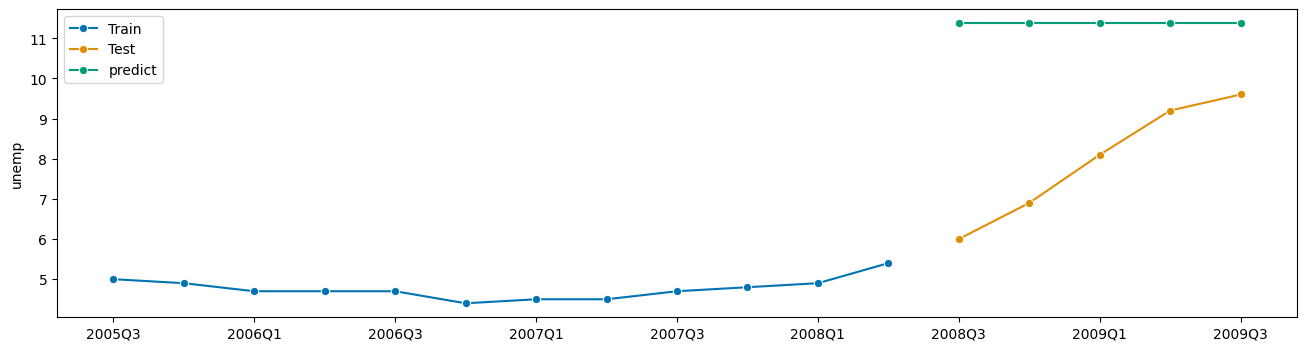

In [5]:
forecaster2 = make_reduction(estimator=ElasticNet(random_state=42, max_iter=100000),
                            scitype="tabular-regressor",
                            window_length=5,
                            strategy="recursive",
                            pooling="global")


y_predict2 = forecaster2.fit_predict(train_y, X=train_xy, fh=[1,2,3,4,5])
print(f'forecaster2 cutoff {forecaster2.cutoff}')
print(y_predict2)
plot_series(train_y.tail(12), test_y,y_predict2, labels=["Train", "Test", "predict"])

In [9]:
y_predict2.rename('test12', inplace=True)
y_predict1.rename('test1', inplace=True)

y_predict1

2008Q3     4.793714
2008Q4     6.430364
2009Q1     9.116874
2009Q2    10.521908
2009Q3     9.619637
Freq: Q-DEC, Name: test1, dtype: float64

In [11]:
import pandas as pd
return_df = pd.concat([y_predict2, y_predict1], axis=1)

In [12]:
return_df

,test12,test1
2008Q3,11.373905,4.793714
2008Q4,11.373905,6.430364
2009Q1,11.373905,9.116874
2009Q2,11.373905,10.521908
2009Q3,11.373905,9.619637


In [16]:
y_predict1.to_list()

[4.793714024691742,
 6.430363788136059,
 9.116874266906695,
 10.521908362259499,
 9.619636704361167]

In [15]:
y_predict1.index

PeriodIndex(['2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3'], dtype='period[Q-DEC]')

In [18]:
type(y_predict2)

pandas.core.series.Series